# import some libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


# GDP per capita rates of countries from wikipedia

In [4]:
import html5lib
gdp=   pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita') 
gdp

[                                                   0  \
 0  >$60,000 $50,000 - $60,000 $40,000 - $50,000 $...   
 
                                                    1                        2  
 0  $20,000 - $30,000 $10,000 - $20,000 $5,000 - $...  $1,000 - $2,500 <$1,000  ,
                                                      0  \
 0      International Monetary Fund (2019 estimates)[3]   
 1    Rank Country/Territory US$ 1  Luxembourg 113,1...   
 2                                                 Rank   
 3                                                    1   
 4                                                    2   
 5                                                    —   
 6                                                    3   
 7                                                    4   
 8                                                    5   
 9                                                    6   
 10                                                   7   
 11          

In [59]:
gdp1 = gdp[2]
gdp1

gdp1=gdp1[gdp1.Rank != '—']
gdp1.reset_index()

gdp1.rename(columns={'US$': 'GDP', 'Country/Territory': 'Country'}, inplace=True)
gdp1

,Rank,Country,GDP
0,1,Luxembourg,113196
1,2,Switzerland,83716
3,3,Norway,77975
4,4,Ireland,77771
5,5,Qatar,69687
6,6,Iceland,67037
7,7,United States,65111
8,8,Singapore,63987
9,9,Denmark,59795
10,10,Australia,53825


# PPP rates from wikipedia

In [32]:
ppp=   pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita') 
ppp



[                                                   0  \
 0  >50,000 35,000–50,000 20,000–35,000 10,000–20,000   
 
                                                   1  
 0  5,000–10,000 2,000–5,000 <2,000 Data unavailable  ,
                                                      0  \
 0      International Monetary Fund (2020 estimates)[5]   
 1    Rank Country/Territory Int$ 1  Qatar 138,910 —...   
 2                                                 Rank   
 3                                                    1   
 4                                                    —   
 5                                                    2   
 6                                                    3   
 7                                                    4   
 8                                                    5   
 9                                                    6   
 10                                                   7   
 11                                                   8   
 12   

In [61]:
ppp1 = ppp[2]
ppp1

ppp1=ppp1[ppp1.Rank != '—']
ppp1.reset_index()

ppp1.rename(columns={'Int$': 'PPP', 'Country/Territory': 'Country'}, inplace=True)
ppp1

,Rank,Country,PPP
0,1,Qatar,138910.0
2,2,Luxembourg,112045.0
3,3,Singapore,105689.0
4,4,Ireland,86988.0
5,5,Brunei,85011.0
6,6,Norway,79638.0
7,7,United Arab Emirates,70441.0
8,8,Kuwait,67891.0
9,9,Switzerland,67558.0
10,10,United States,67426.0


# Biggest cities of countries from wikipedia

In [267]:
cc=   pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_largest_and_second_largest_cities') 
cc

cc1 = cc[0]

cc1


cc1.columns = ('Country','City','d1','d2')
cc1

cc1.drop('d1', axis=1, inplace=True)
cc1.drop('d2', axis=1, inplace=True)
cc1

cc1 = cc1.replace('United States of America','United States')

cc1=cc1.drop_duplicates() 
cc1=cc1.drop([230, 223, 181, 105, 106, 86, 65])
cc1.reset_index()

,index,Country,City
0,0,Afghanistan,Kabul
1,1,Akrotiri and Dhekelia (UK),Episkopi Cantonment
2,2,Åland Islands (Finland),Mariehamn
3,3,Albania,Tirana
4,4,Algeria,Algiers
5,5,American Samoa (US),Tafuna
6,6,Andorra,Andorra la Vella
7,7,Angola,Luanda
8,8,Anguilla (UK),North Side
9,9,Antigua and Barbuda,St. John's


# import city latitudes and longitudes

In [120]:
llc=pd.read_csv('C:/Users/ozana/Desktop/city.csv')
llc.head()

llc=llc.drop_duplicates()
llc.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York City,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [ ]:
agg = pd.merge(gdp1, ppp1, left_on = ['Country'],right_on=['Country'] ,how='left')
agg
agg.drop('Rank_x', axis=1, inplace=True)
agg.drop('Rank_y', axis=1, inplace=True)
agg

# merge datasets

In [269]:
agg1 = pd.merge(agg, cc1, left_on = ['Country'],right_on=['Country'] ,how='left')
agg1.head()


,Country,GDP,PPP,City
0,Luxembourg,113196,112045.0,Luxembourg City
1,Switzerland,83716,67558.0,Zürich
2,Norway,77975,79638.0,Oslo
3,Ireland,77771,86988.0,Dublin
4,Qatar,69687,138910.0,Doha


In [121]:
llc=llc[['city','lat','country','lng','population']]

llc.head()

,city,lat,country,lng,population
0,Tokyo,35.6850,Japan,139.7514,35676000.0
1,New York City,40.6943,United States,-73.9249,19354922.0
2,Mexico City,19.4424,Mexico,-99.1310,19028000.0
3,Mumbai,19.0170,India,72.8570,18978000.0
4,São Paulo,-23.5587,Brazil,-46.6250,18845000.0


# merge datasets

In [132]:
agg2 = pd.merge(agg1, llc, left_on = ['Country','City'],right_on=['country','city'] ,how='left')
agg2
agg2.dropna(subset = ["lat"], inplace=True)
agg2.reset_index()

,index,Country,GDP,PPP,City,city,lat,country,lng,population
0,1,Switzerland,83716,67558.0,Zürich,Zürich,47.3800,Switzerland,8.5500,1108000.0
1,2,Norway,77975,79638.0,Oslo,Oslo,59.9167,Norway,10.7500,835000.0
2,3,Ireland,77771,86988.0,Dublin,Dublin,53.3331,Ireland,-6.2489,1059000.0
3,4,Qatar,69687,138910.0,Doha,Doha,25.2866,Qatar,51.5330,1450000.0
4,5,Iceland,67037,56974.0,Reykjavík,Reykjavík,64.1500,Iceland,-21.9500,166212.0
5,6,United States,65111,67426.0,New York City,New York City,40.6943,United States,-73.9249,19354922.0
6,7,Singapore,63987,105689.0,Singapore,Singapore,1.2930,Singapore,103.8558,5183700.0
7,8,Denmark,59795,55675.0,Copenhagen,Copenhagen,55.6786,Denmark,12.5635,1085000.0
8,9,Australia,53825,54799.0,Sydney,Sydney,-33.9200,Australia,151.1852,4630000.0
9,10,Netherlands,52367,60299.0,Amsterdam,Amsterdam,52.3500,Netherlands,4.9166,1031000.0


In [270]:
agg3=agg2[['City','PPP','population']]
agg3.head()

,City,PPP,population
1,Zürich,67558.0,1108000.0
2,Oslo,79638.0,835000.0
3,Dublin,86988.0,1059000.0
4,Doha,138910.0,1450000.0
5,Reykjavík,56974.0,166212.0


# connect foursquare api

In [143]:
CLIENT_ID = 'N40DJRG4DTUZOTD0BUWYTL5JW13BJAEVGJ2CUAQBHOX5IQ5X' # your Foursquare ID
CLIENT_SECRET = '4DWEHDLWAVZQ5SCBSE0FT22JPMWRXQAA3NR0FPGQUMAPGK0H' # your Foursquare Secret
VERSION = '20200509' # Foursquare API version
LIMIT=100000

# get biggest cities venues

In [179]:
def getNearbyVenues(names, latitudes, longitudes, radius=100000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [180]:
city_venues = getNearbyVenues(names=agg2['City'],
                                   latitudes=llc['lat'],
                                   longitudes=llc['lng']
                                  )


Zürich
Oslo
Dublin
Doha
Reykjavík
New York City
Singapore
Copenhagen
Sydney
Amsterdam
Stockholm
Vienna
Helsinki
Berlin
Toronto
Brussels
Jerusalem
Paris
London
Tokyo
Auckland
Dubai
Rome
Seoul
Valletta
Madrid
Kuwait City
Bandar Seri Begawan
Nicosia
Ljubljana
Manama
Tallinn
Lisbon
Riyadh
Athens
Bratislava
Vilnius
Riga
Bridgetown
Muscat
Budapest
Victoria
Montevideo
Koror
Panama City
Santiago
Zagreb
Warsaw
Bucharest
San José
Port Louis
Moscow
Kuala Lumpur
Castries
Mexico City
Buenos Aires
Beirut
Sofia
Almaty
Istanbul
Bata
São Paulo
Podgorica
Santo Domingo
Roseau
Libreville
Gaborone
Ashgabat
Bangkok
Belgrade
Lima
Minsk
Bogotá
Paramaribo
Quito
Johannesburg
Windhoek
Baghdad
Asunción
Tehran
Kingston
Tirana
Georgetown
Tripoli
Belize City
Baku
Guatemala City
Yerevan
Apia
Amman
Tbilisi
Jakarta
Ulaanbaatar
San Salvador
Algiers
Colombo
Santa Cruz de la Sierra
Thimphu
Casablanca
Tunis
Cairo
Luanda
Djibouti
Port Moresby
Ho Chi Minh City
Vientiane
Tegucigalpa
Caracas
Honiara
Accra
Lagos
Mumbai
Nairobi


In [147]:
print(city_venues.shape)
city_venues.head()

(12588, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zürich,35.685,139.7514,Maruka (丸香),35.696693,139.760121,Udon Restaurant
1,Zürich,35.685,139.7514,Rice Curry Manten (ライスカレーまんてん),35.698213,139.757428,Japanese Curry Restaurant
2,Zürich,35.685,139.7514,Kanda Brazil (神田伯剌西爾),35.695827,139.759630,Coffee Shop
3,Zürich,35.685,139.7514,Aman Tokyo (アマン東京),35.685236,139.765401,Hotel
4,Zürich,35.685,139.7514,Tsujihan (つじ半),35.680763,139.771563,Donburi Restaurant


# summary of venues

In [271]:
ccv=city_venues.groupby(['City','Venue Category']).count().reset_index()
ccv.drop('City Latitude', axis=1, inplace=True)
ccv.drop('City Longitude', axis=1, inplace=True)
ccv.drop('Venue', axis=1, inplace=True)
ccv.drop('Venue Latitude', axis=1, inplace=True)
ccv.rename(columns={'Venue Longitude': 'Count'}, inplace=True)
ccv.head()

,City,Venue Category,Count
0,Accra,Auto Dealership,1
1,Accra,Bakery,5
2,Accra,Bowling Alley,1
3,Accra,Café,7
4,Accra,Clothing Store,1


In [185]:
city_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zürich,35.685,139.7514,Maruka (丸香),35.696693,139.760121,Udon Restaurant
1,Zürich,35.685,139.7514,Rice Curry Manten (ライスカレーまんてん),35.698213,139.757428,Japanese Curry Restaurant
2,Zürich,35.685,139.7514,Kanda Brazil (神田伯剌西爾),35.695827,139.759630,Coffee Shop
3,Zürich,35.685,139.7514,Aman Tokyo (アマン東京),35.685236,139.765401,Hotel
4,Zürich,35.685,139.7514,Tsujihan (つじ半),35.680763,139.771563,Donburi Restaurant


# classfying venues as binary and column

In [183]:
# one hot encoding
cities_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['City'] = city_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_onehot.head()

,Zoo Exhibit,Abruzzo Restaurant,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Ash and Haleem Place,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,Awadhi Restaurant,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Bunsik Restaurant,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cave,Cemetery,Cha Chaan Teng,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,City,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Administrative Building,College Gym,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Confucian Temple,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dairy Store,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dizi Place,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Drive-in Theater,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gukbap Restaurant,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Henan Restaurant,Hill,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Hubei Restaurant,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Indonesian Meatball Place,Indonesian Restaurant,Irani Cafe,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jegaraki,Jewelry Store,Jiangsu Restaurant,Juice Bar,Kafenio,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kushikatsu Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lombard Restaurant,Lounge,Magirio,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Me

# find the rates of venue at the total for each city

In [187]:
cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped.head()

,City,Zoo Exhibit,Abruzzo Restaurant,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Ash and Haleem Place,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,Awadhi Restaurant,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Bunsik Restaurant,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cave,Cemetery,Cha Chaan Teng,Cheese Shop,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Administrative Building,College Gym,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Confucian Temple,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dairy Store,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dizi Place,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Drive-in Theater,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gukbap Restaurant,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Henan Restaurant,Hill,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Hubei Restaurant,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Indonesian Meatball Place,Indonesian Restaurant,Irani Cafe,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jegaraki,Jewelry Store,Jiangsu Restaurant,Juice Bar,Kafenio,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kushikatsu Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lombard Restaurant,Lounge,Magirio,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Me

# find most common 10 venues at the cities

In [191]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [192]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cities_grouped['City']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Accra,Fast Food Restaurant,Indian Restaurant,Shopping Mall,Café,Multiplex,Hotel,Pizza Place,Bakery,Dessert Shop,Ice Cream Shop
1,Addis Ababa,Coffee Shop,Hotel,Indonesian Restaurant,Shopping Mall,Bakery,Multiplex,Japanese Restaurant,Steakhouse,Supermarket,Fast Food Restaurant
2,Algiers,Korean Restaurant,Park,Coffee Shop,Hotel,Beach,Trail,Scenic Lookout,Gukbap Restaurant,Department Store,Multiplex
3,Almaty,Hotel,Shopping Mall,Coffee Shop,Fast Food Restaurant,Historic Site,Train Station,Electronics Store,Supermarket,Hotpot Restaurant,Clothing Store
4,Amman,Park,Bakery,Coffee Shop,Ice Cream Shop,Bookstore,Sushi Restaurant,Scenic Lookout,Garden,Marijuana Dispensary,Wine Shop


# cluster analysis

In [223]:
# set number of clusters
kclusters = 4

cities_grouped_clustering = cities_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:150] 

array([2, 0, 3, 0, 3, 2, 0, 0, 0, 2, 2, 2, 3, 1, 0, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 2, 3, 3, 2, 0, 2, 2, 2, 0,
       0, 3, 2, 0, 2, 3, 3, 3, 2, 3, 3, 0, 2, 2, 0, 2, 0, 2, 3, 0, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 0, 2, 0,
       2, 0, 2, 3, 3, 3, 3, 0, 0, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 0, 3, 2, 0, 0, 2, 2, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 0, 2, 3,
       0, 3, 2, 3, 3, 3, 0, 0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3])

In [224]:
cities_venues_sorted

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Accra,Fast Food Restaurant,Indian Restaurant,Shopping Mall,Café,Multiplex,Hotel,Pizza Place,Bakery,Dessert Shop,Ice Cream Shop
1,0,Addis Ababa,Coffee Shop,Hotel,Indonesian Restaurant,Shopping Mall,Bakery,Multiplex,Japanese Restaurant,Steakhouse,Supermarket,Fast Food Restaurant
2,2,Algiers,Korean Restaurant,Park,Coffee Shop,Hotel,Beach,Trail,Scenic Lookout,Gukbap Restaurant,Department Store,Multiplex
3,0,Almaty,Hotel,Shopping Mall,Coffee Shop,Fast Food Restaurant,Historic Site,Train Station,Electronics Store,Supermarket,Hotpot Restaurant,Clothing Store
4,2,Amman,Park,Bakery,Coffee Shop,Ice Cream Shop,Bookstore,Sushi Restaurant,Scenic Lookout,Garden,Marijuana Dispensary,Wine Shop
5,1,Amsterdam,Coffee Shop,Café,Nightclub,Indian Restaurant,Resort,Portuguese Restaurant,Shopping Mall,Turkish Restaurant,Seafood Restaurant,Bakery
6,0,Antananarivo,Hotel,Coffee Shop,Shopping Mall,Clothing Store,Train Station,Henan Restaurant,Chinese Restaurant,Historic Site,History Museum,Electronics Store
7,0,Apia,Fast Food Restaurant,Hotel,Shopping Mall,Coffee Shop,Train Station,Department Store,Eastern European Restaurant,Park,Zoo,Asian Restaurant
8,0,Ashgabat,Hotel,Coffee Shop,Vietnamese Restaurant,Noodle House,Resort,Pizza Place,Café,Multiplex,Brewery,Asian Restaurant
9,1,Asmara,Fast Food Restaurant,Rest Area,Restaurant,Shopping Mall,Pizza Place,Café,Bus Station,River,Sandwich Place,Park


In [225]:
# add clustering labels


cities_merged = agg2


cities_merged = cities_merged.join(cities_venues_sorted.set_index('City'), on='City')

cities_merged.head()

,Country,GDP,PPP,City,city,lat,country,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Switzerland,83716,67558.0,Zürich,Zürich,47.3800,Switzerland,8.5500,1108000.0,2,Hotel,Coffee Shop,Japanese Restaurant,Garden,Park,Wagashi Place,Ramen Restaurant,Sake Bar,Udon Restaurant,Japanese Curry Restaurant
2,Norway,77975,79638.0,Oslo,Oslo,59.9167,Norway,10.7500,835000.0,2,Park,Brewery,Gourmet Shop,Yoga Studio,Pizza Place,Ice Cream Shop,Pier,Wine Shop,Movie Theater,Bookstore
3,Ireland,77771,86988.0,Dublin,Dublin,53.3331,Ireland,-6.2489,1059000.0,2,Ice Cream Shop,Taco Place,Coffee Shop,Bakery,Park,Pet Store,Gourmet Shop,Mexican Restaurant,Salon / Barbershop,Gym / Fitness Center
4,Qatar,69687,138910.0,Doha,Doha,25.2866,Qatar,51.5330,1450000.0,1,Hotel,Scenic Lookout,Seafood Restaurant,Beach,Fast Food Restaurant,Mountain,Restaurant,Indian Restaurant,Dhaba,Coffee Shop
5,Iceland,67037,56974.0,Reykjavík,Reykjavík,64.1500,Iceland,-21.9500,166212.0,2,Park,Ice Cream Shop,Pizza Place,Theater,Restaurant,Plaza,Art Museum,Bakery,Gym / Fitness Center,Fruit & Vegetable Store


# clusters on world map

In [226]:


# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=1)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['lat'], cities_merged['lng'], cities_merged['City'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# is the data suitable for hotel rates at total vs GDP, PPP, Population

In [245]:
cities_grouped_for_reg=cities_grouped[['City','Hotel','Shopping Mall']]
cities_grouped_for_reg

,City,Hotel,Shopping Mall
0,Accra,0.064935,0.090909
1,Addis Ababa,0.140000,0.070000
2,Algiers,0.090000,0.010000
3,Almaty,0.254902,0.176471
4,Amman,0.010000,0.000000
5,Amsterdam,0.000000,0.021277
6,Antananarivo,0.258065,0.096774
7,Apia,0.162791,0.139535
8,Ashgabat,0.150000,0.010000
9,Asmara,0.030303,0.090909


In [239]:
agg3=agg2[['City','GDP','PPP','population']]

agg3


,City,GDP,PPP,population
1,Zürich,83716,67558.0,1108000.0
2,Oslo,77975,79638.0,835000.0
3,Dublin,77771,86988.0,1059000.0
4,Doha,69687,138910.0,1450000.0
5,Reykjavík,67037,56974.0,166212.0
6,New York City,65111,67426.0,19354922.0
7,Singapore,63987,105689.0,5183700.0
8,Copenhagen,59795,55675.0,1085000.0
9,Sydney,53825,54799.0,4630000.0
10,Amsterdam,52367,60299.0,1031000.0


# merge data

In [246]:
cfr = pd.merge(cities_grouped_for_reg, agg3, left_on = ['City'],right_on=['City'] ,how='left')
cfr

,City,Hotel,Shopping Mall,GDP,PPP,population
0,Accra,0.064935,0.090909,2223,7343.0,2121000.0
1,Addis Ababa,0.140000,0.070000,953,2702.0,3100000.0
2,Algiers,0.090000,0.010000,3980,16091.0,3354000.0
3,Almaty,0.254902,0.176471,9139,30178.0,1209000.0
4,Amman,0.010000,0.000000,4386,9939.0,1060000.0
5,Amsterdam,0.000000,0.021277,52367,60299.0,1031000.0
6,Antananarivo,0.258065,0.096774,463,1776.0,1697000.0
7,Apia,0.162791,0.139535,4500,6493.0,61916.0
8,Ashgabat,0.150000,0.010000,7816,21855.0,727700.0
9,Asmara,0.030303,0.090909,342,1103.0,620802.0


# GDP vs Hotel scatter

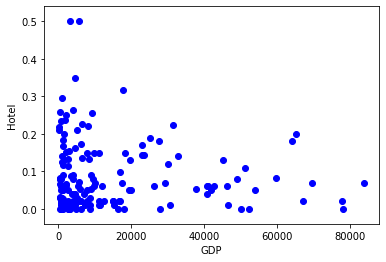

In [241]:
plt.scatter(cfr.GDP, cfr.Hotel,  color='blue')
plt.xlabel("GDP")
plt.ylabel("Hotel")
plt.show()

# PPP vs Hotel scatter

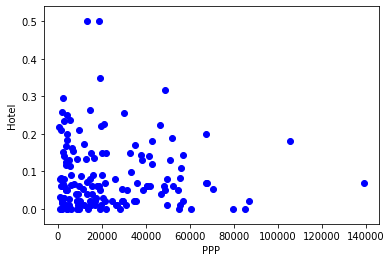

In [242]:
plt.scatter(cfr.PPP, cfr.Hotel,  color='blue')
plt.xlabel("PPP")
plt.ylabel("Hotel")
plt.show()

# Population vs Hotel scatter

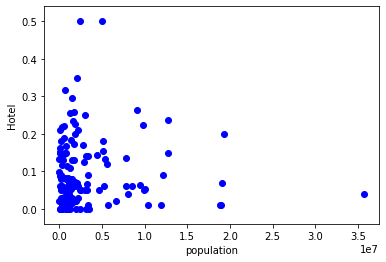

In [244]:
plt.scatter(cfr.population, cfr.Hotel,  color='blue')
plt.xlabel("population")
plt.ylabel("Hotel")
plt.show()

# there is no relation

# lets get biggest 50 PPP and omit 0 values

In [264]:
cfr=cfr.sort_values(by=['PPP'],ascending=False)
cfr

cfr=cfr[cfr['population']>2000000]
cfr=cfr.head(50)
cfr.reset_index()

,index,City,Hotel,Mall,GDP,PPP,population
0,124,Singapore,0.180000,0.020000,63987,105689.0,5183700.0
1,72,Kuwait City,0.070000,0.000000,29266,67891.0,2063000.0
2,97,New York City,0.200000,0.050000,65111,67426.0,19354922.0
3,115,Riyadh,0.144578,0.060241,22865,56912.0,4465000.0
4,23,Berlin,0.010000,0.000000,46563,55306.0,3406000.0
5,143,Vienna,0.000000,0.058824,50022,55171.0,2400000.0
6,127,Sydney,0.050000,0.000000,53825,54799.0,4630000.0
7,137,Toronto,0.060000,0.010000,46212,52144.0,5213000.0
8,106,Paris,0.050000,0.000000,41760,48640.0,9904000.0
9,80,London,0.060000,0.000000,41030,48169.0,8567000.0


#  PPP vs Hotel

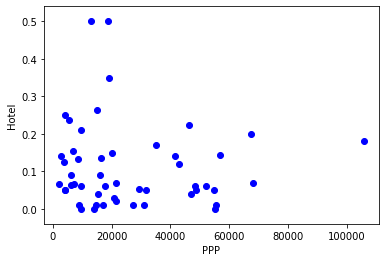

In [265]:
plt.scatter(cfr.PPP, cfr.Hotel,  color='blue')
plt.xlabel("PPP")
plt.ylabel("Hotel")
plt.show()

# population vs Hotel

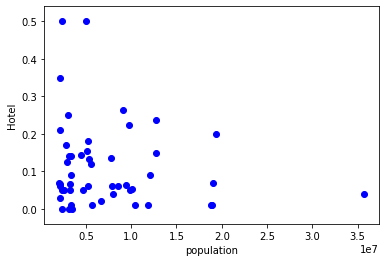

In [266]:
plt.scatter(cfr.population, cfr.Hotel,  color='blue')
plt.xlabel("population")
plt.ylabel("Hotel")
plt.show()

# there is no relation between GDP,PPP, Population vs Hotel rates